In [4]:
# -*- coding: utf-8 -*-
# Random Forest Regression

# Importing the libraries
import numpy as np
import pandas as pd

import xgboost as xgb
import lightgbm as lgb
import catboost as cat

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

import gc
gc.enable()

/Users/Xiaohe/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [5]:
# pandas / plt options
pd.options.display.max_columns = 999
plt.rcParams['figure.figsize'] = (14, 7)
font = {'family' : 'verdana',
        'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

In [6]:
# Importing the dataset
train = pd.read_csv("extracted_fields_train.gz",dtype =
                    {'data': str, "fullVisitorId": str, "visitId": str, "sessionId": str, "visitId": np.int64})
test = pd.read_csv("extracted_fields_test.gz", dtype = 
                   {"data": str, "fullVisitorId": str, "visitId": str, "sessionId": str, "visitId": np.int64})

In [15]:
train.head(-50)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,Sessions,Avg. Session Duration,Bounce Rate,Revenue,Transactions,Goal Conversion Rate
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1.0,1.472830e+09,Chrome,desktop,0.0,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1.0,1.0,1.0,1.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1.0,1.472880e+09,Firefox,desktop,0.0,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1.0,1.0,1.0,1.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1.0,1.472865e+09,Chrome,desktop,0.0,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1.0,1.0,1.0,1.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1.0,1.472881e+09,UC Browser,desktop,0.0,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1.0,1.0,1.0,NaN,NaN,(not set),NaN,google + online,organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2.0,1.472823e+09,Chrome,mobile,1.0,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1.0,1.0,NaN,1.0,NaN,NaN,(not set),1.0,(not provided),organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
5,Organic Search,20160902,2938943183656635653,2938943183656635653_1472807194,1472807194,1.0,1.472807e+09,Chrome,desktop,0.0,Windows,not available in demo dataset,Europe,Italy,not available in demo dataset,fastwebnet.it,not available in demo dataset,Southern Europe,1.0,1.0,1.0,1.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
6,Organic Search,20160902,1905672039242460897,1905672039242460897_1472817241,1472817241,1.0,1.472817e+09,Chrome,desktop,0.0,Windows,not available in demo dataset,Asia,Pakistan,not available in demo dataset,unknown.unknown,not available in demo dataset,Southern Asia,1.0,1.0,1.0,1.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
7,Organic Search,20160902,537222803633850821,537222803633850821_1472812602,1472812602,1.0,1.472813e+09,Chrome,desktop,0.0,Windows,Brisbane,Oceania,Australia,(not set),bigpond.net.au,Queensland,Australasia,1.0,1.0,1.0,1.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
8,Organic Search,20160902,4445454811831400414,4445454811831400414_1472805784,1472805784,1.0,1.472806e+09,Internet Explorer,desktop,0.0,Windows,not available in demo dataset,Europe,Austria,not available in demo dataset,spar.at,not available in demo dataset,Western Europe,1.0,1.0,1.0,1.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
9,Organic Search,20160902,9499785259412240342,9499785259412240342_1472812272,1472812272,1.0,1.472812e+09,Firefox,desktop,0.0,Windows,not available in demo dataset,Europe,Netherlands,not available in demo dataset,chello.nl,not available in demo dataset,Western Europe,1.0,1.0,1.0,1.0

In [10]:
train.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1.0,1.472830e+09,Chrome,desktop,0.0,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1.0,1.0,1.0,1.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1.0,1.472880e+09,Firefox,desktop,0.0,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1.0,1.0,1.0,1.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1.0,1.472865e+09,Chrome,desktop,0.0,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1.0,1.0,1.0,1.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1.0,1.472881e+09,UC Browser,desktop,0.0,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1.0,1.0,1.0,NaN,NaN,(not set),NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2.0,1.472823e+09,Chrome,mobile,1.0,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1.0,1.0,NaN,1.0,NaN,NaN,(not set),1.0,(not provided),organic,NaN,google


In [7]:
train.shape
test.shape
train.head()
train.columns
train.describe(include="all")

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
count,903653,9.036530e+05,903653,903653,9.036530e+05,903653.000000,9.036530e+05,903653,903653,903653.000000,903653,903653,903653,903653,903653,903653,903653,903653,450630.0,903653.000000,703060.0,903553.000000,1.151500e+04,10946,903653,274005.0,400723,903653,330941,903653
unique,8,NaN,714167,902755,NaN,NaN,NaN,54,3,NaN,20,649,6,222,94,28064,376,23,NaN,NaN,NaN,NaN,NaN,44,10,NaN,3658,7,1475,380
top,Organic Search,NaN,1957458976293878100,4580211096974089358_1484552919,NaN,NaN,NaN,Chrome,desktop,NaN,Windows,not available in demo dataset,Americas,United States,not available in demo dataset,(not set),not available in demo dataset,Northern America,NaN,NaN,NaN,NaN,NaN,Google Merchandise Collection,(not set),NaN,(not provided),organic,/,google
freq,381561,NaN,278,2,NaN,NaN,NaN,620364,664479,NaN,350072,508229,450377,364744,508229,244881,508229,390657,NaN,NaN,NaN,NaN,NaN,5122,865347,NaN,366363,381561,75523,400788
mean,NaN,2.016589e+07,NaN,NaN,1.485007e+09,2.264897,1.485007e+09,NaN,NaN,0.264618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.596538,1.0,3.849764,1.337448e+08,NaN,NaN,1.0,NaN,NaN,NaN,NaN
std,NaN,4.697698e+03,NaN,NaN,9.022124e+06,9.283735,9.022124e+06,NaN,NaN,0.441130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.641437,0.0,7.025274,4.482852e+08,NaN,NaN,0.0,NaN,NaN,NaN,NaN
min,NaN,2.016080e+07,NaN,NaN,1.470035e+09,1.000000,1.470035e+09,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.0,1.000000,1.000000e+04,NaN,NaN,1.0,NaN,NaN,NaN,NaN
25%,NaN,2.016103e+07,NaN,NaN,1.477561e+09,1.000000,1.477561e+09,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.0,1.000000,2.493000e+07,NaN,NaN,1.0,NaN,NaN,NaN,NaN
50%,NaN,2.017011e+07,NaN,NaN,1.483949e+09,1.000000,1.483949e+09,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.000000,1.0,1.000000,4.945000e+07,NaN,NaN,1.0,NaN,NaN,NaN,NaN
75%,NaN,2.017042e+07,NaN,NaN,1.492759e+09,1.000000,1.492759e+09,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.000000,1.0,4.000000,1.076550e+08,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [12]:
train_external_1 = pd.read_csv("Train_external_data.csv", low_memory = False, skiprows = 6, dtype={"Client Id": str})
train_external_2 = pd.read_csv("Train_external_data_2.csv", low_memory = False, skiprows = 6, dtype={"Client Id": str})
test_external_1 = pd.read_csv("Test_external_data.csv", low_memory = False, skiprows = 6, dtype={"Client Id": str})
test_external_2 = pd.read_csv("Test_external_data_2.csv", low_memory = False, skiprows = 6, dtype={"Client Id": str})

In [13]:
# get visitId from Client Id
for df in [train_external_1, train_external_2, test_external_1, test_external_2]:
    df["visitId"] = df["Client Id"].apply(lambda x : x.split('.', 1)[1]).astype(np.int64)

# Merge with train/test data
train = train.merge(pd.concat([train_external_1, train_external_2], sort=False), how="left", on="visitId")
test = test.merge(pd.concat([test_external_1, test_external_2], sort=False), how="left", on="visitId")

#Drop Client Id
for df in [train, test]:
    df.drop("Client Id", 1, inplace=True)

# Cleaning Revenue
for df in [train, test]:
    df["Revenue"].fillna("$", inplace = True)
    df["Revenue"] = df["Revenue"].apply(lambda x : x.replace("$", "").replace(",", ""))
    df["Revenue"] = pd.to_numeric(df["Revenue"], errors = "coerce")
    df["Revenue"].fillna(0.0, inplace = True)

for df in [train_external_1,train_external_2, test_external_1, test_external_2]:
    del df
gc.collect()

270

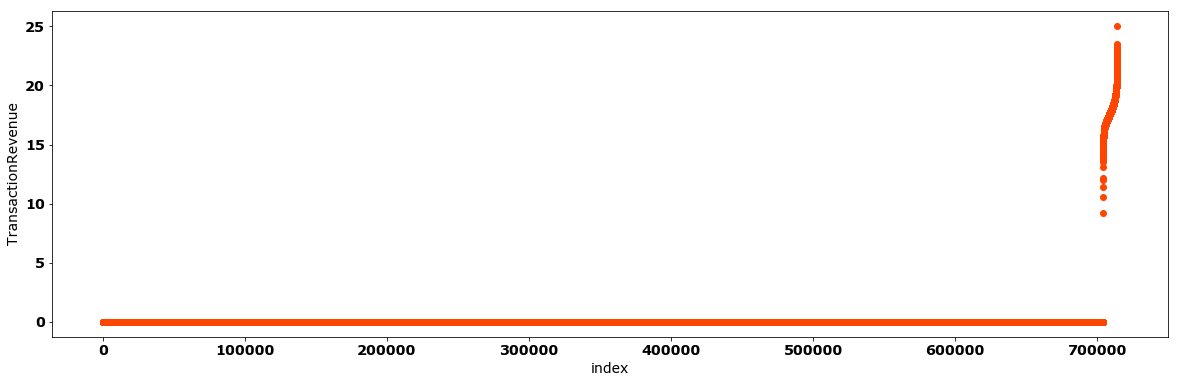

In [16]:
#Graphs
target_sums = train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
plt.figure(figsize=(20,6))
plt.scatter(range(target_sums.shape[0]),np.sort(np.log1p(target_sums["totals.transactionRevenue"].values)), color = "#ff4500")
plt.xlabel('index')
plt.ylabel('TransactionRevenue')
plt.show()

In [17]:
train.date = pd.to_datetime(train.date, format="%Y%m%d")
test.date = pd.to_datetime(test.date, format="%Y%m%d")
plt.figure(figsize=(20,6))

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

Unique visitor ids in train: 714167
Unique visitor ids in test: 617242
Common visitors in train and test:  7679


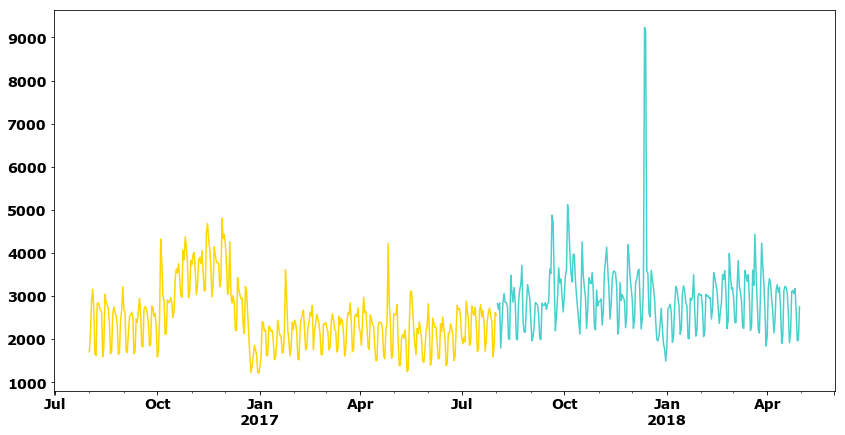

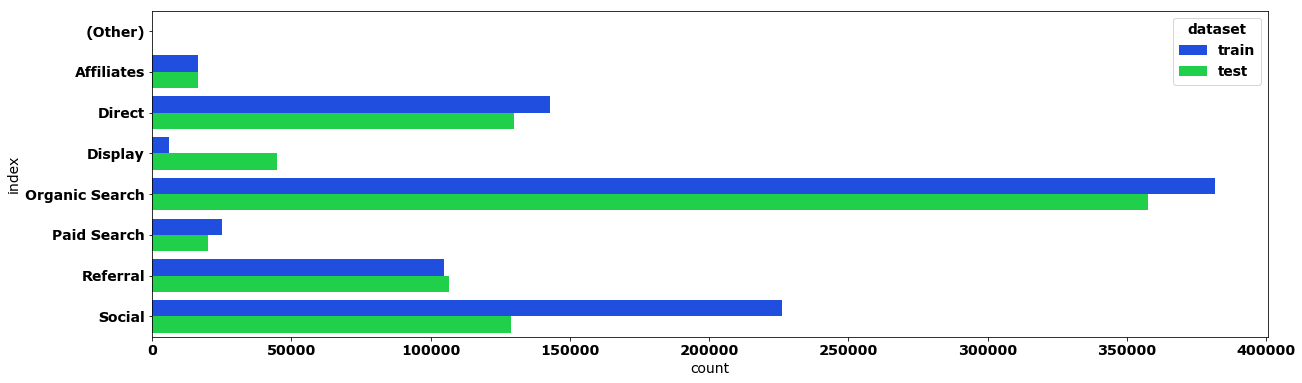

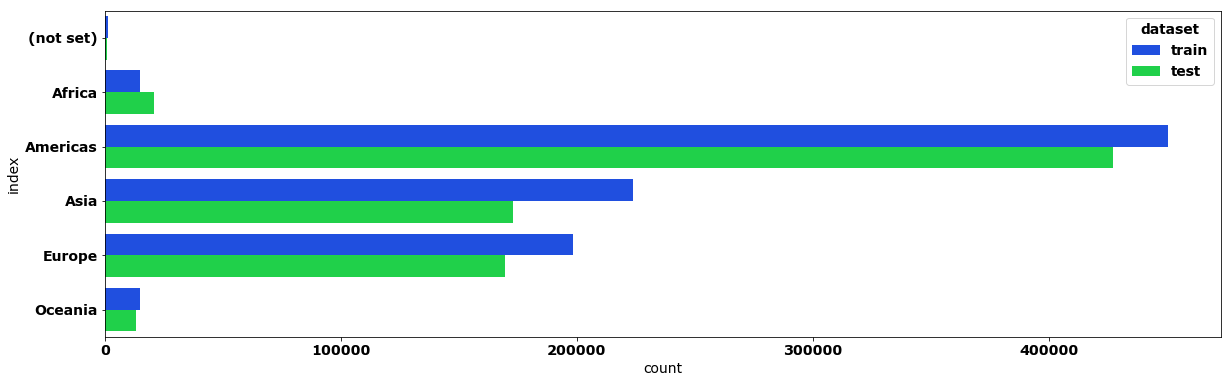

In [20]:
train.date.value_counts().sort_index().plot(label="train", color="#FFD700")
test.date.value_counts().sort_index().plot(label="test", color="#48D1CC")

palette = sns.color_palette("bright")

def drawBars(columnname):
    plt.figure(figsize=(20,6))
    sns.barplot(x="count", 
                y="index", 
                hue="dataset",
                data=pd.melt(pd.concat([train[columnname].value_counts().rename("train"), 
                                        test[columnname].value_counts().rename("test")], 
                                        axis=1, sort="False").reset_index(), 
                            id_vars="index", var_name="dataset", value_name="count"),
                palette = palette)
drawBars("channelGrouping")
drawBars("geoNetwork.continent")

ids_train = set(train.fullVisitorId.unique())
ids_test = set(test.fullVisitorId.unique())
print("Unique visitor ids in train:", len(ids_train))
print("Unique visitor ids in test:", len(ids_test))
print("Common visitors in train and test: ", len(ids_train & ids_test))

In [21]:
problem = train[train.sessionId.map(train.sessionId.value_counts() == 2)].sort_values(["sessionId", "visitStartTime"])
problem.head(10)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,Sessions,Avg. Session Duration,Bounce Rate,Revenue,Transactions,Goal Conversion Rate
212027,Organic Search,2016-08-21,0011338928267756760,0011338928267756760_1471848731,1471848731,1.0,1.471849e+09,Chrome,desktop,0.0,Windows,not available in demo dataset,Asia,China,not available in demo dataset,unknown.unknown,not available in demo dataset,Eastern Asia,NaN,2.0,1.0,1.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
82177,Organic Search,2016-08-22,0011338928267756760,0011338928267756760_1471848731,1471848731,1.0,1.471849e+09,Chrome,desktop,0.0,Windows,not available in demo dataset,Asia,China,not available in demo dataset,unknown.unknown,not available in demo dataset,Eastern Asia,NaN,2.0,1.0,1.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
848580,Referral,2016-12-31,0014884852016449602,0014884852016449602_1483257533,1483257533,2.0,1.483258e+09,Chrome,desktop,0.0,Macintosh,Los Angeles,Americas,United States,Los Angeles CA,(not set),California,Northern America,1.0,1.0,NaN,1.0,NaN,NaN,(not set),1.0,NaN,referral,/,mall.googleplex.com,NaN,NaN,NaN,0.0,NaN,NaN
802550,Referral,2017-01-01,0014884852016449602,0014884852016449602_1483257533,1483257533,2.0,1.483258e+09,Chrome,desktop,0.0,Macintosh,Los Angeles,Americas,United States,Los Angeles CA,(not set),California,Northern America,NaN,10.0,NaN,6.0,NaN,NaN,(not set),1.0,NaN,referral,/,mall.googleplex.com,NaN,NaN,NaN,0.0,NaN,NaN
428608,Organic Search,2017-06-05,0019612470994343873,0019612470994343873_1496731675,1496731675,24.0,1.496732e+09,Chrome,desktop,0.0,Macintosh,Mountain View,Americas,United States,San Francisco-Oakland-San Jose CA,comcast.net,California,Northern America,NaN,14.0,NaN,14.0,NaN,NaN,(not set),1.0,(not provided),organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
202288,Organic Search,2017-06-06,0019612470994343873,0019612470994343873_1496731675,1496731675,24.0,1.496732e+09,Chrome,desktop,0.0,Macintosh,Mountain View,Americas,United States,San Francisco-Oakland-San Jose CA,comcast.net,California,Northern America,NaN,2.0,NaN,2.0,NaN,NaN,(not set),1.0,(not provided),organic,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
46654,Paid Search,2017-05-19,0031542961723593073,0031542961723593073_1495261490,1495261490,1.0,1.495261e+09,Chrome,tablet,1.0,iOS,not available in demo dataset,Americas,United States,not available in demo dataset,comcast.net,not available in demo dataset,Northern America,NaN,37.0,1.0,32.0,NaN,{KeyWord:Google Brand Items},AW - Accessories,NaN,+google +tshirt +store,cpc,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
857847,Paid Search,2017-05-20,0031542961723593073,0031542961723593073_1495261490,1495261490,1.0,1.495264e+09,Chrome,tablet,1.0,iOS,not available in demo dataset,Americas,United States,not available in demo dataset,comcast.net,not available in demo dataset,Northern America,NaN,5.0,1.0,4.0,NaN,{KeyWord:Google Brand Items},AW - Accessories,NaN,+google +tshirt +store,cpc,NaN,google,NaN,NaN,NaN,0.0,NaN,NaN
618668,Referral,2017-01-24,0039798900163330977,0039798900163330977_1485331011,1485331011,4.0,1.485331e+09,Chrome,desktop,0.0,Macintosh,(not set),Asia,Singapore,(not set),(not set),(not set),Southeast Asia,NaN,5.0,NaN,5.0,NaN,NaN,(not set),1.0,NaN,referral,/,mall.googleplex.com,NaN,NaN,NaN,0.0,NaN,NaN
520543,Referral,2017-01-25,0039798900163330977,0039798900163330977_1485331011,1485331011,4.0,1.485331e+09,Chrome,desktop,0.0,Macintosh,(not set),Asia,Singapore,(not set),(not set),(no

Train:  [     0 869451  16411    396     38      3      3      0      1]


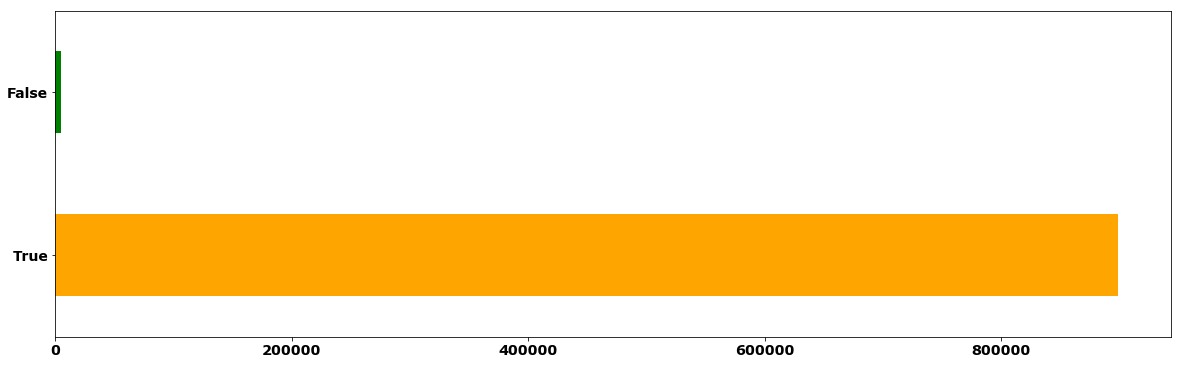

In [22]:
plt.figure(figsize=(20,6))
(train.visitStartTime == train.visitId).value_counts()
(train.visitStartTime == train.visitId).value_counts().plot.barh(color = ["orange", "green"])
train.head()

print("Train: ", np.bincount(train.visitId.value_counts()))

In [23]:
#Preprocessing
train.visitStartTime = pd.to_datetime(train.visitStartTime, unit="s")
test.visitStartTime = pd.to_datetime(test.visitStartTime, unit="s")
train["date"] = train.visitStartTime
test["date"] = test.visitStartTime


train.set_index("visitStartTime", inplace=True)
test.set_index("visitStartTime", inplace=True)
train.sort_index(inplace=True)
test.sort_index(inplace=True)

def clearRare(columnname, limit = 1000):
    vc = test[columnname].value_counts()
    common = vc > limit
    common = set(common.index[common].values)
    print("Set", sum(vc <= limit), columnname, "categories to 'other';", end=" ")
    
    train.loc[train[columnname].map(lambda x: x not in common), columnname] = 'other'
    test.loc[test[columnname].map(lambda x: x not in common), columnname] = 'other'
    print("now there are", train[columnname].nunique(), "categories in train")

train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

clearRare("device.browser")
clearRare("device.operatingSystem")
clearRare("geoNetwork.country")
clearRare("geoNetwork.city")
clearRare("geoNetwork.metro")
clearRare("geoNetwork.networkDomain")
clearRare("geoNetwork.region")
clearRare("geoNetwork.subContinent")
clearRare("trafficSource.adContent")
clearRare("trafficSource.campaign")
clearRare("trafficSource.keyword")
clearRare("trafficSource.medium")
clearRare("trafficSource.referralPath")
clearRare("trafficSource.source")

Set 98 device.browser categories to 'other'; now there are 11 categories in train
Set 15 device.operatingSystem categories to 'other'; now there are 8 categories in train
Set 160 geoNetwork.country categories to 'other'; now there are 60 categories in train
Set 656 geoNetwork.city categories to 'other'; now there are 77 categories in train
Set 86 geoNetwork.metro categories to 'other'; now there are 24 categories in train
Set 25689 geoNetwork.networkDomain categories to 'other'; now there are 62 categories in train
Set 314 geoNetwork.region categories to 'other'; now there are 62 categories in train
Set 5 geoNetwork.subContinent categories to 'other'; now there are 19 categories in train
Set 46 trafficSource.adContent categories to 'other'; now there are 4 categories in train
Set 23 trafficSource.campaign categories to 'other'; now there are 5 categories in train
Set 2409 trafficSource.keyword categories to 'other'; now there are 8 categories in train
Set 1 trafficSource.medium categor

In [ ]:
# Clearing leaked data:
for df in [train, test]:
    df["Avg. Session Duration"][df["Avg. Session Duration"] == 0] = "00:00:00"
    df["Avg. Session Duration"] = df["Avg. Session Duration"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
    df["Bounce Rate"] = df["Bounce Rate"].astype(str).apply(lambda x: x.replace('%', '')).astype(float)
    df["Goal Conversion Rate"] = df["Goal Conversion Rate"].astype(str).apply(lambda x: x.replace('%', '')).astype(float)
    
for df in [train, test]:
    # remember these features were equal, but not always? May be it means something...
    df["id_incoherence"] = pd.to_datetime(df.visitId, unit='s') != df.date
    # remember visitId dublicates?
    df["visitId_dublicates"] = df.visitId.map(df.visitId.value_counts())
    # remember session dublicates?
    df["session_dublicates"] = df.sessionId.map(df.sessionId.value_counts())    

for df in [train, test]:
    df['weekday'] = df['date'].dt.dayofweek.astype(object)
    df['time'] = df['date'].dt.second + df['date'].dt.minute*60 + df['date'].dt.hour*3600
    #df['month'] = df['date'].dt.month   # it must not be included in features during learning!
    df['day'] = df['date'].dt.date       # it must not be included in features during learning!

df = pd.concat([train, test])
df.sort_values(['fullVisitorId', 'date'], ascending=True, inplace=True)    

 
df['prev_session'] = (df['date'] - df[['fullVisitorId', 'date']].groupby('fullVisitorId')['date'].shift(1)).astype(np.int64) // 1e9 // 60 // 60
df['next_session'] = (df['date'] - df[['fullVisitorId', 'date']].groupby('fullVisitorId')['date'].shift(-1)).astype(np.int64) // 1e9 // 60 // 60
df.sort_index(inplace=True)

train = df[:len(train)]
test = df[len(train):]

for df in [train, test]:
    df['source.country'] = df['trafficSource.source'] + '_' + df['geoNetwork.country']
    df['campaign.medium'] = df['trafficSource.campaign'] + '_' + df['trafficSource.medium']
    df['browser.category'] = df['device.browser'] + '_' + df['device.deviceCategory']
    df['browser.os'] = df['device.browser'] + '_' + df['device.operatingSystem']    
    
for df in [train, test]:
    df['device_deviceCategory_channelGrouping'] = df['device.deviceCategory'] + "_" + df['channelGrouping']
    df['channelGrouping_browser'] = df['device.browser'] + "_" + df['channelGrouping']
    df['channelGrouping_OS'] = df['device.operatingSystem'] + "_" + df['channelGrouping']
    
    for i in ['geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country','geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region','geoNetwork.subContinent']:
        for j in ['device.browser','device.deviceCategory', 'device.operatingSystem', 'trafficSource.source']:
            df[i + "_" + j] = df[i] + "_" + df[j]
    
    df['content.source'] = df['trafficSource.adContent'].astype(str) + "_" + df['source.country']
    df['medium.source'] = df['trafficSource.medium'] + "_" + df['source.country']    
    
for feature in ["totals.hits", "totals.pageviews"]:
    info = pd.concat([train, test], sort=False).groupby("fullVisitorId")[feature].mean()
    train["usermean_" + feature] = train.fullVisitorId.map(info)
    test["usermean_" + feature] = test.fullVisitorId.map(info)
    
for feature in ["visitNumber"]:
    info = pd.concat([train, test], sort=False).groupby("fullVisitorId")[feature].max()
    train["usermax_" + feature] = train.fullVisitorId.map(info)
    test["usermax_" + feature] = test.fullVisitorId.map(info)

excluded = ['date', 'fullVisitorId', 'sessionId', 'totals.transactionRevenue', 'visitId', 'visitStartTime', 
            'month', 'day', 'help']

cat_cols = [f for f in train.columns if (train[f].dtype == 'object' and f not in excluded)]
real_cols = [f for f in train.columns if (not f in cat_cols and f not in excluded)]    
    
train[cat_cols].nunique()  
    
    
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    lbl = LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))
    test[col] = lbl.transform(list(test[col].values.astype('str')))    
    
for col in real_cols:
    train[col] = train[col].astype(float)
    test[col] = test[col].astype(float)    
    
train[real_cols + cat_cols].head()   
for to_del in ["date", "sessionId", "visitId", "day"]:
    del train[to_del]
    del test[to_del]

excluded = ['date', 'fullVisitorId', 'sessionId', 'totals.transactionRevenue', 'visitId', 'visitStartTime', "month", "help"]

cat_cols = [f for f in train.columns if (train[f].dtype == 'int64' and f not in excluded)]
real_cols = [f for f in train.columns if (not f in cat_cols and f not in excluded)]

from sklearn.metrics import mean_squared_error
def score(data, y):
    validation_res = pd.DataFrame(
    {"fullVisitorId": data["fullVisitorId"].values,
     "transactionRevenue": data["totals.transactionRevenue"].values,
     "predictedRevenue": np.expm1(y)})

    validation_res = validation_res.groupby("fullVisitorId")["transactionRevenue", "predictedRevenue"].sum().reset_index()
    return np.sqrt(mean_squared_error(np.log1p(validation_res["transactionRevenue"].values), 
                                     np.log1p(validation_res["predictedRevenue"].values)))    
    
    
from sklearn.model_selection import GroupKFold

class KFoldValidation():
    def __init__(self, data, n_splits=5):
        unique_vis = np.array(sorted(data['fullVisitorId'].astype(str).unique()))
        folds = GroupKFold(n_splits)
        ids = np.arange(data.shape[0])
        
        self.fold_ids = []
        for trn_vis, val_vis in folds.split(X=unique_vis, y=unique_vis, groups=unique_vis):
            self.fold_ids.append([
                    ids[data['fullVisitorId'].astype(str).isin(unique_vis[trn_vis])],
                    ids[data['fullVisitorId'].astype(str).isin(unique_vis[val_vis])]
                ])
            
    def validate(self, train, test, features, model, name="", prepare_stacking=False, 
                 fit_params={"early_stopping_rounds": 50, "verbose": 100, "eval_metric": "rmse"}):
        model.FI = pd.DataFrame(index=features)
        full_score = 0
        
        if prepare_stacking:
            test[name] = 0
            train[name] = np.NaN
        
        for fold_id, (trn, val) in enumerate(self.fold_ids):
            devel = train[features].iloc[trn]
            y_devel = np.log1p(train["totals.transactionRevenue"].iloc[trn])
            valid = train[features].iloc[val]
            y_valid = np.log1p(train["totals.transactionRevenue"].iloc[val])
                       
            print("Fold ", fold_id, ":")
            model.fit(devel, y_devel, eval_set=[(valid, y_valid)], **fit_params)
            
            if len(model.feature_importances_) == len(features):  # some bugs in catboost?
                model.FI['fold' + str(fold_id)] = model.feature_importances_ / model.feature_importances_.sum()

            predictions = model.predict(valid)
            predictions[predictions < 0] = 0
            print("Fold ", fold_id, " error: ", mean_squared_error(y_valid, predictions)**0.5)
            
            fold_score = score(train.iloc[val], predictions)
            full_score += fold_score / len(self.fold_ids)
            print("Fold ", fold_id, " score: ", fold_score)
            
            if prepare_stacking:
                train[name].iloc[val] = predictions
                
                test_predictions = model.predict(test[features])
                test_predictions[test_predictions < 0] = 0
                test[name] += test_predictions / len(self.fold_ids)
                
        print("Final score: ", full_score)
        return full_score

Kfolder = KFoldValidation(train)

In [ ]:
lgbmodel = lgb.LGBMRegressor(n_estimators=1500, objective="regression", metric="rmse", num_leaves=31, min_child_samples=100,
                      learning_rate=0.03, bagging_fraction=0.75, feature_fraction=0.55, bagging_frequency=6, 
                      bagging_seed=2019, subsample=.9, colsample_bytree=.9, use_best_model=True)

Kfolder.validate(train, test, real_cols + cat_cols, lgbmodel, "lgbpred", prepare_stacking=True)

lgbmodel.FI.mean(axis=1).sort_values()[:30].plot(kind="barh")

def create_user_df(df):
    agg_data = df[real_cols + cat_cols + ['fullVisitorId']].groupby('fullVisitorId').mean()
    
    pred_list = df[['fullVisitorId', 'lgbpred']].groupby('fullVisitorId').apply(lambda visitor_df: list(visitor_df.lgbpred))\
        .apply(lambda x: {'pred_'+str(i): pred for i, pred in enumerate(x)})
    all_predictions = pd.DataFrame(list(pred_list.values), index=agg_data.index)
    feats = all_predictions.columns

    all_predictions['t_mean'] = all_predictions.mean(axis=1)
    all_predictions['t_median'] = all_predictions.median(axis=1)   # including t_mean as one of the elements? well, ok
    all_predictions['t_sum_log'] = all_predictions.sum(axis=1)
    all_predictions['t_sum_act'] = all_predictions.fillna(0).sum(axis=1)
    all_predictions['t_nb_sess'] = all_predictions.isnull().sum(axis=1)

    full_data = pd.concat([agg_data, all_predictions], axis=1).astype(float)
    full_data['fullVisitorId'] = full_data.index
    del agg_data, all_predictions
    gc.collect()
    return full_data

user_train = create_user_df(train)
user_test = create_user_df(test)

features = list(user_train.columns)[:-1]  # don't include "fullVisitorId"
user_train["totals.transactionRevenue"] = train[['fullVisitorId', 'totals.transactionRevenue']].groupby('fullVisitorId').sum()

for f in features:
    if f not in user_test.columns:
        user_test[f] = np.nan
        
Kfolder = KFoldValidation(user_train)

lgbmodel = lgb.LGBMRegressor(n_estimators=1500, objective="regression", metric="rmse", num_leaves=31, min_child_samples=100,
                      learning_rate=0.03, bagging_fraction=0.7, feature_fraction=0.55, bagging_frequency=6, 
                      bagging_seed=2019, subsample=.9, colsample_bytree=.9, use_best_model=True)

Kfolder.validate(user_train, user_test, features, lgbmodel, name="lgbfinal", prepare_stacking=True)

In [ ]:
xgbmodel = xgb.XGBRegressor(max_depth=22, learning_rate=0.02, n_estimators=1000, 
                                         objective='reg:linear', gamma=1.45, seed=2019, silent=False,
                                        subsample=0.67, colsample_bytree=0.054, colsample_bylevel=0.50)

Kfolder.validate(user_train, user_test, features, xgbmodel, name="xgbfinal", prepare_stacking=True)


In [ ]:
catmodel = cat.CatBoostRegressor(iterations=500, learning_rate=0.2, depth=5, random_seed=2019)

Kfolder.validate(user_train, user_test, features, catmodel, name="catfinal", prepare_stacking=True,
                fit_params={"use_best_model": True, "verbose": 100})

user_train['PredictedLogRevenue'] = 0.5 * user_train["lgbfinal"] + \
                                    0.1 * user_train["xgbfinal"] + \
                                    0.4 * user_train["catfinal"]
score(user_train, user_train.PredictedLogRevenue)

user_test['PredictedLogRevenue'] = 0.5 * user_test["lgbfinal"] +  0.4 * user_test["catfinal"] + 0.1 * user_test["xgbfinal"]
user_test[['PredictedLogRevenue']].to_csv('leak_check_submission.csv', index=True)

Fold  0 :
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.61871
[200]	valid_0's rmse: 1.59132
[300]	valid_0's rmse: 1.58316
[400]	valid_0's rmse: 1.57967
[500]	valid_0's rmse: 1.57761
[600]	valid_0's rmse: 1.57679
[700]	valid_0's rmse: 1.57596
[800]	valid_0's rmse: 1.57563
[900]	valid_0's rmse: 1.57543
Early stopping, best iteration is:
[863]	valid_0's rmse: 1.57519
Fold  0  error:  1.5738747359780638
Fold  0  score:  1.554482107032712
Fold  1 :
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.59112
[200]	valid_0's rmse: 1.5673
[300]	valid_0's rmse: 1.5595
[400]	valid_0's rmse: 1.55662
[500]	valid_0's rmse: 1.55463
[600]	valid_0's rmse: 1.55395
[700]	valid_0's rmse: 1.55303
[800]	valid_0's rmse: 1.5528
Early stopping, best iteration is:
[777]	valid_0's rmse: 1.55261
Fold  1  error:  1.5514494430417287
Fold  1  score:  1.5541053893716592
Fold  2 :
Training until validation scores don't improve for 50 rounds.
[100

[19:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2146 extra nodes, 580 pruned nodes, max_depth=22
[19:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6776 extra nodes, 1136 pruned nodes, max_depth=22
[19:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 584 extra nodes, 78 pruned nodes, max_depth=22
[19:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2338 extra nodes, 604 pruned nodes, max_depth=22
[19:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4196 extra nodes, 940 pruned nodes, max_depth=22
[19:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6450 extra nodes, 1722 pruned nodes, max_depth=22
[19:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5332 extra nodes, 2046 pruned nodes, max_depth=22
[19:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1998 extra nodes, 454 pruned nodes, max_depth=22
[19:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 ro

[19:22:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3360 extra nodes, 2130 pruned nodes, max_depth=22
[19:22:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1744 extra nodes, 1166 pruned nodes, max_depth=22
[19:22:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1560 extra nodes, 1102 pruned nodes, max_depth=22
[19:22:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 798 extra nodes, 656 pruned nodes, max_depth=22
[19:22:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 966 extra nodes, 344 pruned nodes, max_depth=22
[19:22:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 14 pruned nodes, max_depth=11
[19:22:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 804 pruned nodes, max_depth=22
[19:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7722 extra nodes, 4960 pruned nodes, max_depth=22
[19:22:22] src/tree/updater_prune.cc:74: tree pruning end, 1 root

[19:24:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1522 extra nodes, 2686 pruned nodes, max_depth=22
[19:24:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 702 extra nodes, 150 pruned nodes, max_depth=22
[19:24:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6834 extra nodes, 8328 pruned nodes, max_depth=22
[19:24:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2934 extra nodes, 2254 pruned nodes, max_depth=22
[19:24:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1820 extra nodes, 1834 pruned nodes, max_depth=22
[19:24:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 9004 extra nodes, 10270 pruned nodes, max_depth=22
[19:24:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 938 extra nodes, 288 pruned nodes, max_depth=20
[19:24:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5338 extra nodes, 4492 pruned nodes, max_depth=22
[19:24:37] src/tree/updater_prune.cc:74: tree pruning end, 

[19:26:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1644 extra nodes, 480 pruned nodes, max_depth=22
[19:26:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3574 extra nodes, 7276 pruned nodes, max_depth=22
[19:26:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6342 extra nodes, 5466 pruned nodes, max_depth=22
[19:26:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2786 extra nodes, 4050 pruned nodes, max_depth=22
[19:26:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 804 extra nodes, 626 pruned nodes, max_depth=22
[19:26:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4182 extra nodes, 7324 pruned nodes, max_depth=22
[19:26:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 88 pruned nodes, max_depth=18
[19:26:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3726 extra nodes, 1506 pruned nodes, max_depth=22
[19:26:55] src/tree/updater_prune.cc:74: tree pruning end, 1 r

[19:28:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1520 extra nodes, 1488 pruned nodes, max_depth=22
[19:29:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1726 extra nodes, 1962 pruned nodes, max_depth=22
[19:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3998 extra nodes, 6778 pruned nodes, max_depth=22
[19:29:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 14 pruned nodes, max_depth=9
[19:29:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3444 extra nodes, 3392 pruned nodes, max_depth=22
[19:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 110 pruned nodes, max_depth=17
[19:29:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1846 extra nodes, 742 pruned nodes, max_depth=22
[19:29:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1186 extra nodes, 544 pruned nodes, max_depth=21
[19:29:15] src/tree/updater_prune.cc:74: tree pruning end, 1 root

[19:31:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 300 pruned nodes, max_depth=22
[19:31:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1218 extra nodes, 2430 pruned nodes, max_depth=21
[19:31:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5942 extra nodes, 2260 pruned nodes, max_depth=22
[19:31:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1490 extra nodes, 1108 pruned nodes, max_depth=22
[19:31:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 104 pruned nodes, max_depth=22
[19:31:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 122 pruned nodes, max_depth=13
[19:31:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 630 pruned nodes, max_depth=22
[19:31:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3578 extra nodes, 10620 pruned nodes, max_depth=22
[19:31:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roo

[19:33:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1560 extra nodes, 6658 pruned nodes, max_depth=22
[19:33:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 458 pruned nodes, max_depth=22
[19:33:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4458 extra nodes, 3434 pruned nodes, max_depth=22
[19:33:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 666 pruned nodes, max_depth=22
[19:33:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2384 extra nodes, 5464 pruned nodes, max_depth=22
[19:33:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3532 extra nodes, 4800 pruned nodes, max_depth=22
[19:33:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1992 extra nodes, 1128 pruned nodes, max_depth=21
[19:33:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3402 extra nodes, 1172 pruned nodes, max_depth=22
[19:33:52] src/tree/updater_prune.cc:74: tree pruning end, 1

[19:35:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3282 extra nodes, 3714 pruned nodes, max_depth=22
[19:35:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 118 pruned nodes, max_depth=11
[19:35:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1116 extra nodes, 2012 pruned nodes, max_depth=21
[19:35:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 28 pruned nodes, max_depth=22
[19:36:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5052 extra nodes, 2912 pruned nodes, max_depth=22
[19:36:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4426 extra nodes, 12026 pruned nodes, max_depth=22
[19:36:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2302 extra nodes, 3588 pruned nodes, max_depth=22
[19:36:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2110 extra nodes, 9164 pruned nodes, max_depth=22
[19:36:10] src/tree/updater_prune.cc:74: tree pruning end, 1 r

[19:40:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 198 pruned nodes, max_depth=22
[19:40:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2494 extra nodes, 660 pruned nodes, max_depth=22
[19:40:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 564 extra nodes, 72 pruned nodes, max_depth=22
[19:40:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5396 extra nodes, 1718 pruned nodes, max_depth=22
[19:40:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5614 extra nodes, 2308 pruned nodes, max_depth=22
[19:41:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 900 extra nodes, 482 pruned nodes, max_depth=20
[19:41:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 34 pruned nodes, max_depth=22
[19:41:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 14 pruned nodes, max_depth=20
[19:41:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 33

[19:42:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6410 extra nodes, 6126 pruned nodes, max_depth=22
[19:43:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8066 extra nodes, 4746 pruned nodes, max_depth=22
[19:43:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 256 extra nodes, 62 pruned nodes, max_depth=18
[19:43:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3794 extra nodes, 2548 pruned nodes, max_depth=22
[19:43:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1572 extra nodes, 2188 pruned nodes, max_depth=22
[19:43:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1086 extra nodes, 848 pruned nodes, max_depth=22
[19:43:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1030 extra nodes, 568 pruned nodes, max_depth=22
[19:43:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=8
[19:43:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

[19:45:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6970 extra nodes, 5554 pruned nodes, max_depth=22
[19:45:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 44 pruned nodes, max_depth=14
[200]	validation_0-rmse:1.57002
[19:45:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 46 pruned nodes, max_depth=15
[19:45:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8376 extra nodes, 21290 pruned nodes, max_depth=22
[19:45:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1006 extra nodes, 2030 pruned nodes, max_depth=17
[19:45:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 46 pruned nodes, max_depth=13
[19:45:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2748 extra nodes, 876 pruned nodes, max_depth=22
[19:45:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1172 extra nodes, 616 pruned nodes, max_depth=22
[19:45:19] src/tree/updater_prune.cc

[19:47:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 654 extra nodes, 394 pruned nodes, max_depth=22
[19:47:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1936 extra nodes, 2120 pruned nodes, max_depth=22
[19:47:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1772 extra nodes, 3158 pruned nodes, max_depth=22
[19:47:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2376 extra nodes, 3334 pruned nodes, max_depth=22
[19:47:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3406 extra nodes, 1160 pruned nodes, max_depth=22
[19:47:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 9228 extra nodes, 8692 pruned nodes, max_depth=22
[19:47:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 448 pruned nodes, max_depth=22
[19:47:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2454 extra nodes, 4572 pruned nodes, max_depth=22
[19:47:24] src/tree/updater_prune.cc:74: tree pruning end, 1

[19:49:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 556 pruned nodes, max_depth=22
[19:49:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2630 extra nodes, 3096 pruned nodes, max_depth=22
[19:49:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 900 extra nodes, 722 pruned nodes, max_depth=22
[19:49:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6808 extra nodes, 18296 pruned nodes, max_depth=22
[19:49:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1180 extra nodes, 2014 pruned nodes, max_depth=22
[19:49:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5488 extra nodes, 4656 pruned nodes, max_depth=22
[19:49:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3742 extra nodes, 3986 pruned nodes, max_depth=22
[19:49:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2072 extra nodes, 1650 pruned nodes, max_depth=22
[19:49:31] src/tree/updater_prune.cc:74: tree pruning end, 

[19:51:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 500 pruned nodes, max_depth=22
[19:51:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3350 extra nodes, 2326 pruned nodes, max_depth=22
[19:51:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 568 extra nodes, 680 pruned nodes, max_depth=22
[19:51:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 160 pruned nodes, max_depth=18
[19:51:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 856 extra nodes, 1056 pruned nodes, max_depth=22
[19:51:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2164 extra nodes, 3748 pruned nodes, max_depth=22
[19:51:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8660 extra nodes, 18636 pruned nodes, max_depth=22
[19:51:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10686 extra nodes, 21414 pruned nodes, max_depth=22
[19:51:41] src/tree/updater_prune.cc:74: tree pruning end, 1

[19:53:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 560 extra nodes, 486 pruned nodes, max_depth=22
[19:53:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4494 extra nodes, 7660 pruned nodes, max_depth=22
[19:53:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 120 pruned nodes, max_depth=21
[19:53:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 586 pruned nodes, max_depth=22
[19:53:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3198 extra nodes, 4806 pruned nodes, max_depth=22
[19:53:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 94 pruned nodes, max_depth=21
[19:53:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7028 extra nodes, 11474 pruned nodes, max_depth=22
[19:53:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3134 extra nodes, 2398 pruned nodes, max_depth=22
[19:53:50] src/tree/updater_prune.cc:74: tree pruning end, 1 root

[19:55:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4072 extra nodes, 4002 pruned nodes, max_depth=22
[19:55:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 970 extra nodes, 1368 pruned nodes, max_depth=22
[19:55:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8636 extra nodes, 4190 pruned nodes, max_depth=22
[19:55:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7152 extra nodes, 20298 pruned nodes, max_depth=22
[19:55:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1482 extra nodes, 948 pruned nodes, max_depth=22
[19:55:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1830 extra nodes, 5484 pruned nodes, max_depth=22
[19:55:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 1546 pruned nodes, max_depth=22
[19:55:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3656 extra nodes, 928 pruned nodes, max_depth=22
[19:56:00] src/tree/updater_prune.cc:74: tree pruning end, 

[19:57:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1928 extra nodes, 2824 pruned nodes, max_depth=22
[19:57:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 1486 pruned nodes, max_depth=22
[19:57:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2674 extra nodes, 1456 pruned nodes, max_depth=22
[19:57:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 300 extra nodes, 248 pruned nodes, max_depth=22
[19:58:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 680 extra nodes, 2490 pruned nodes, max_depth=22
[19:58:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1282 extra nodes, 2462 pruned nodes, max_depth=22
[19:58:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1320 extra nodes, 3118 pruned nodes, max_depth=22
[19:58:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1018 extra nodes, 2016 pruned nodes, max_depth=22
[19:58:07] src/tree/updater_prune.cc:74: tree pruning end, 1

[20:03:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5186 extra nodes, 830 pruned nodes, max_depth=22
[20:03:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3374 extra nodes, 876 pruned nodes, max_depth=22
[20:03:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2814 extra nodes, 716 pruned nodes, max_depth=22
